## The Adult Dataset (Binary Classification with Synthetic Data)
The adult dataset is a classic imbalanced classification task dataset. The final column specifies whether the person makes <= 50k a year, or more.

Here we see MWEM stretched - we are forced to carefully select our feature dependence (via the "splits" feature) to acheive a reasonable data synthesis.

We show that by either specifying a max_bin_count, or by dropping continuous columns, we can greatly speed up performance.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import RidgeClassifier

import utils

from opendp.smartnoise.synthesizers.mwem import MWEMSynthesizer

from load_data import load_data

In [2]:
datasets = load_data(['adult'])

adult = datasets['adult']['data']
adult_cat_ord = datasets['adult']['data'].copy()

cat_ord_columns = ['workclass',
                       'marital-status', 
                       'occupation', 
                       'relationship', 
                       'race',
                       'gender',
                       'native-country',
                       'income',
                       'education',
                       'age',
                       'education-num',
                       'hours-per-week',
                  'earning-class']

for c in adult_cat_ord.columns.values:
    if not c in cat_ord_columns:
        adult_cat_ord = adult_cat_ord.drop([c], axis=1)

Memory consumed by adult:3907448
Memory use too high with adult, subsampling to:1500000
Memory consumed by adult:1599872


In [3]:
synth = MWEMSynthesizer(0.1, 500, 30, 15, splits=[[0,1,2],[3,4,5],[6,7,8],[9,10],[11,12],[13,14]], max_bin_count=400)
synth.fit(datasets['adult']['data'])

synth_cat_ord = MWEMSynthesizer(0.1, 500, 30, 15, split_factor=3)
synth_cat_ord.fit(adult_cat_ord)

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.splits = np.array(self.splits)
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 1465404 in column: 2 exceeds max_bin_count, defaulting to: 400. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 100000 in column: 10 exceeds max_bin_count, defaulting to: 400. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 4357 in column: 11 exceeds max_bin_count, defaulting to: 400. Is this a continuous variable?
  warnings.

In [4]:
sample_size = len(adult)
synthetic = synth.sample(int(sample_size))
synthetic_cat_ord = synth_cat_ord.sample(int(sample_size))


Trained on Real Data
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1868
           1       0.79      0.33      0.46       632

    accuracy                           0.81      2500
   macro avg       0.80      0.65      0.67      2500
weighted avg       0.80      0.81      0.78      2500

Accuracy real: 0.8076

Trained on Synthetic Data
              precision    recall  f1-score   support

           0       0.74      0.55      0.63      1868
           1       0.24      0.41      0.30       632

    accuracy                           0.52      2500
   macro avg       0.49      0.48      0.47      2500
weighted avg       0.61      0.52      0.55      2500

Accuracy synthetic: 0.518

Random Guessing
              precision    recall  f1-score   support

           0       0.49      0.47      0.48      1234
           1       0.50      0.51      0.51      1266

    accuracy                           0.49      2500
   macro avg  

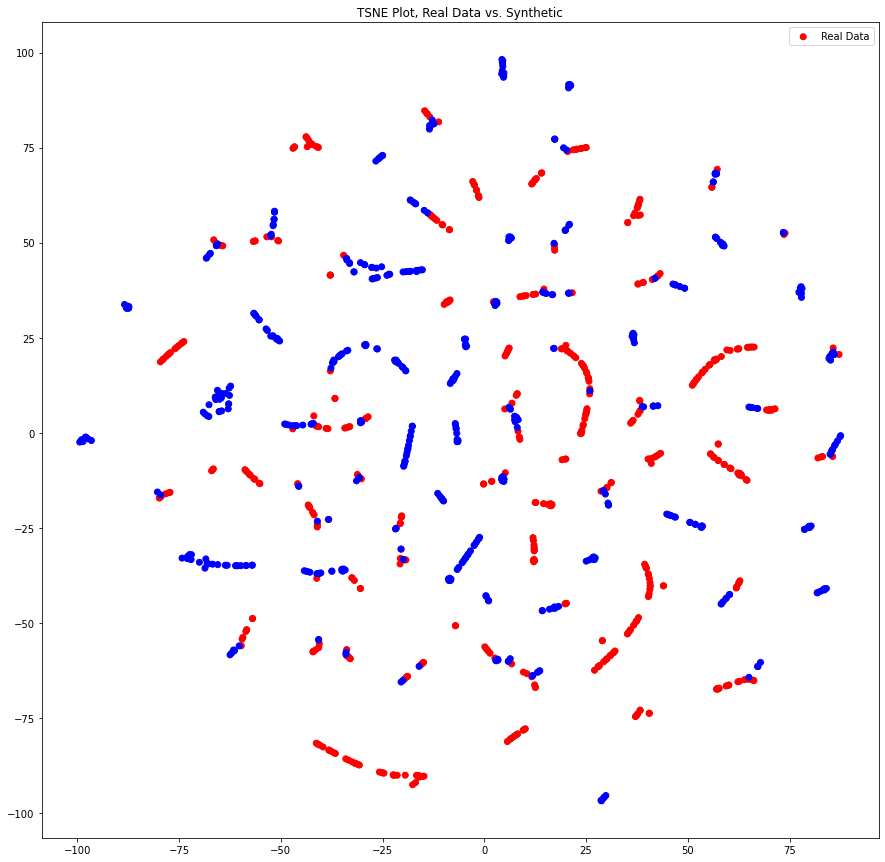

                age     workclass        fnlwgt     education  education-num  \
count  12499.000000  12499.000000  1.249900e+04  12499.000000   12499.000000   
mean      38.428194      3.858549  1.899421e+05     10.290903      10.084407   
std       13.517946      1.436107  1.054376e+05      3.884641       2.570341   
min       17.000000      0.000000  1.930200e+04      0.000000       1.000000   
25%       27.500000      4.000000  1.187100e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.780020e+05     11.000000      10.000000   
75%       47.000000      4.000000  2.364510e+05     12.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    12499.000000  12499.000000  12499.000000  12499.000000  12499.000000   
mean         2.598608      6.608529      1.445796      3.663573      0.670054   
std          1.501778      4.229357 

(RidgeClassifier(), RidgeClassifier())

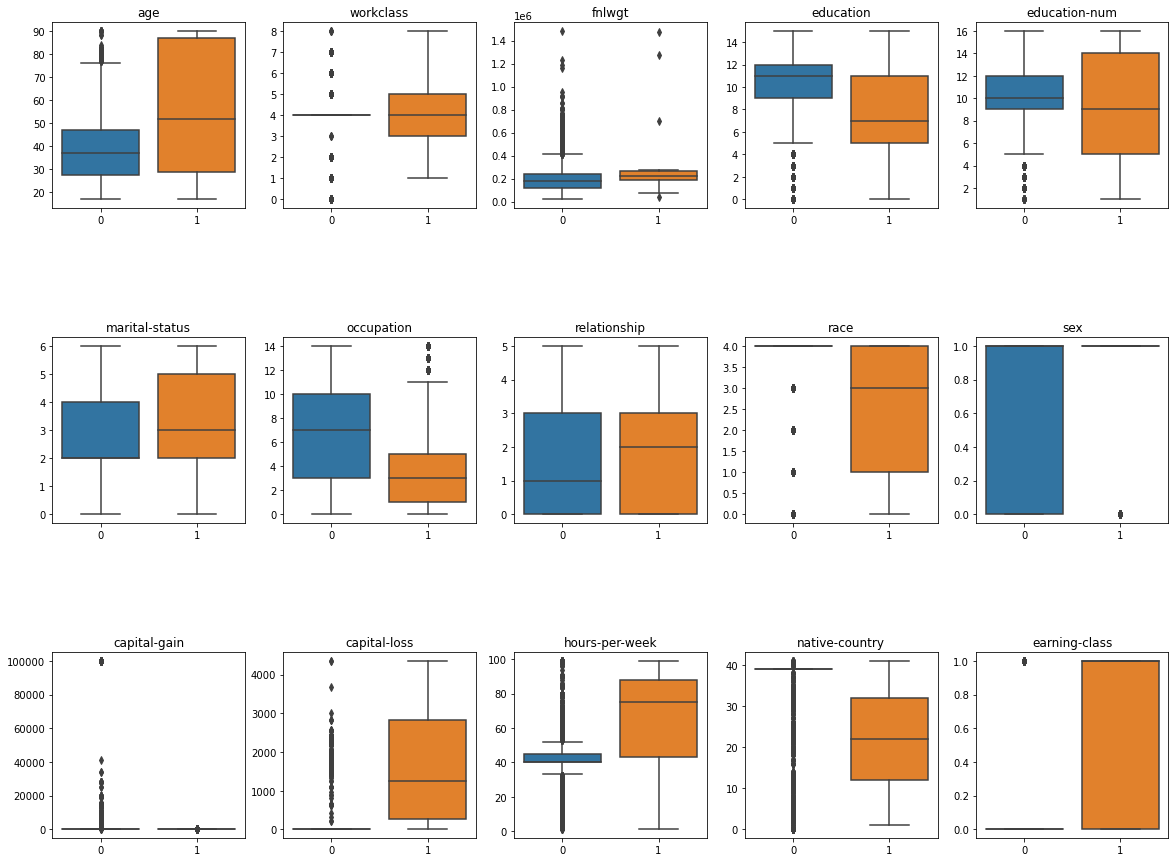

In [5]:

utils.test_real_vs_synthetic_data(adult, synthetic, RidgeClassifier, tsne=True, box=True, describe=True)


Trained on Real Data
              precision    recall  f1-score   support

           0       0.91      0.60      0.72      1868
           1       0.41      0.82      0.55       632

    accuracy                           0.65      2500
   macro avg       0.66      0.71      0.63      2500
weighted avg       0.78      0.65      0.68      2500

Accuracy real: 0.6544

Trained on Synthetic Data
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1868
           1       0.28      0.20      0.23       632

    accuracy                           0.67      2500
   macro avg       0.52      0.51      0.51      2500
weighted avg       0.63      0.67      0.65      2500

Accuracy synthetic: 0.6708

Random Guessing
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1250
           1       0.51      0.51      0.51      1250

    accuracy                           0.51      2500
   macro avg 

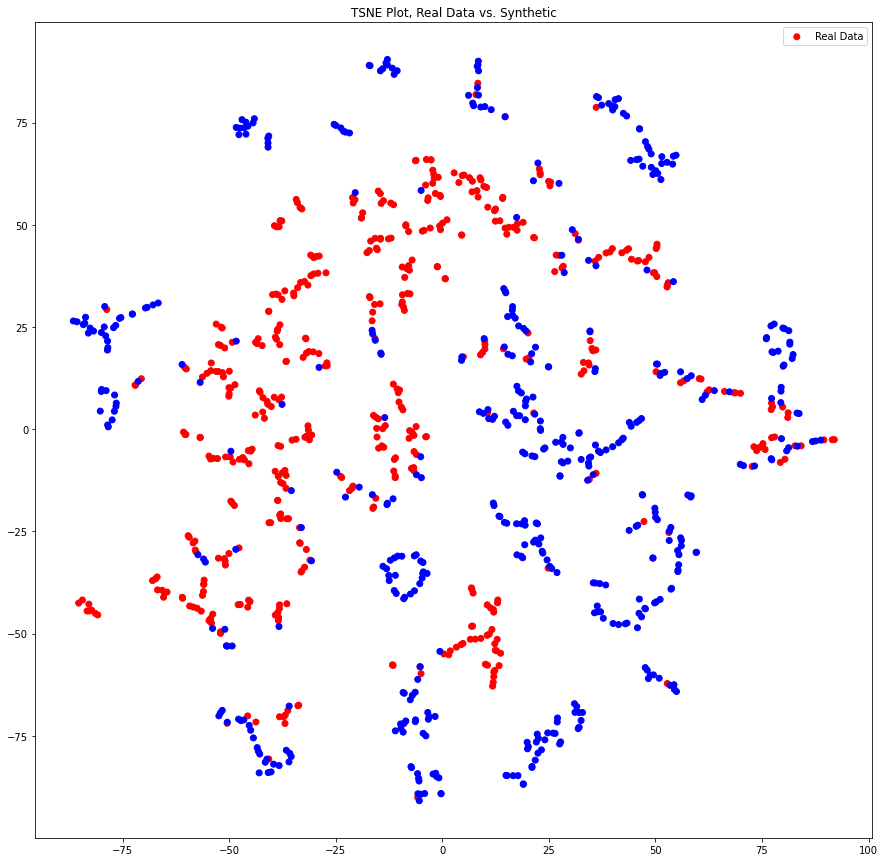

                age     workclass     education  education-num  \
count  12499.000000  12499.000000  12499.000000   12499.000000   
mean      38.428194      3.858549     10.290903      10.084407   
std       13.517946      1.436107      3.884641       2.570341   
min       17.000000      0.000000      0.000000       1.000000   
25%       27.500000      4.000000      9.000000       9.000000   
50%       37.000000      4.000000     11.000000      10.000000   
75%       47.000000      4.000000     12.000000      12.000000   
max       90.000000      8.000000     15.000000      16.000000   

       marital-status    occupation  relationship          race  \
count    12499.000000  12499.000000  12499.000000  12499.000000   
mean         2.598608      6.608529      1.445796      3.663573   
std          1.501778      4.229357      1.602877      0.849648   
min          0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000   
50%

(ComplementNB(), ComplementNB())

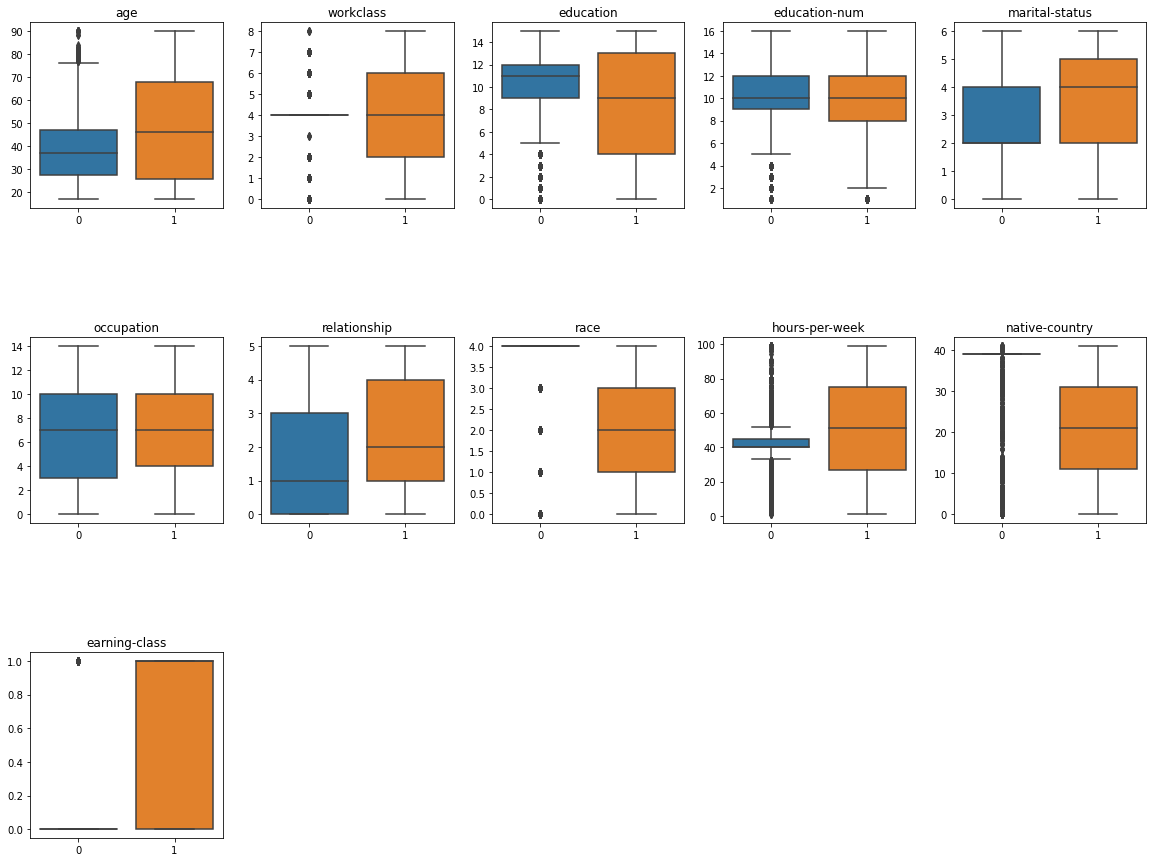

In [6]:
utils.test_real_vs_synthetic_data(adult_cat_ord, synthetic_cat_ord, ComplementNB, tsne=True, box=True, describe=True)